In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import numpy as np
from scipy.fftpack import rfft

In [10]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter, crossings_nonzero_pos2neg

In [96]:
pts = GaitTimeSeries.load_data('/home/c/data/pdkit/gait-turning/GAIT_-_2016-10-21_11-04-10_-_705ed5dc44_-_2504.csv')
cts = GaitTimeSeries.load_data('/home/c/data/pdkit/acc/noname-1527810517911.tsv', format_file='accapp')
gp = GaitProcessor(sampling_frequency=100)

In [60]:
ts.head()

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000000000,0.000000,0.141856,9.847352,-0.329203,9.853874
1970-01-01 00:00:00.008056642,0.008057,0.275932,9.795278,-0.420182,9.808168
1970-01-01 00:00:00.018035890,0.018036,0.349553,9.594165,-0.524330,9.614838
1970-01-01 00:00:00.028045656,0.028046,0.475249,9.476251,-0.578798,9.505798
1970-01-01 00:00:00.038085940,0.038086,0.691924,9.460090,-0.609324,9.504911


In [92]:
ts.head()

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000,0.00,0.098,1.422,9.574,9.679523
1970-01-01 00:00:00.020,0.02,0.141,1.427,9.667,9.772773
1970-01-01 00:00:00.070,0.07,0.158,1.439,9.634,9.742158
1970-01-01 00:00:00.140,0.14,0.093,1.451,9.576,9.685754
1970-01-01 00:00:00.180,0.18,0.014,1.465,9.591,9.702252


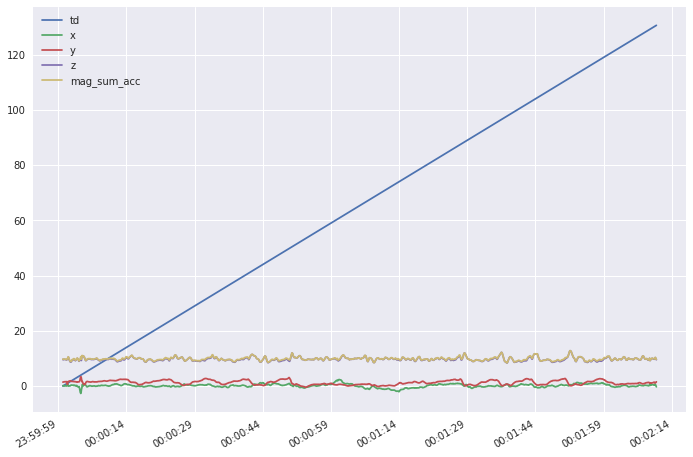

In [93]:
tss.plot()

In [61]:
strikes, strike_i = gp.heel_strikes(ts.x)

In [62]:
walking = ts[strike_i[0]: strike_i[-1]]
total_steps = len(walking)

steps = []

for z in range(len(strike_i) - 1):
    steps.append([ts.x[strike_i[z]: strike_i[z+1]]])

first_foot= [len(a[0]) for a in steps[::2]]
second_foot = [len(a[0])  for a in steps[1::2]]

first_sym = np.sum([a / total_steps for a in first_foot])
second_sym = np.sum([a / total_steps for a in second_foot])

np.sum(first_sym) + np.sum(second_sym)

1.0

In [63]:
f_gi = [a / gp.sampling_frequency for a in first_foot]
s_gi = [a / gp.sampling_frequency for a in second_foot]

In [64]:
f_gi

[15.53]

In [65]:
np.mean([np.std(f_gi), np.std(s_gi)])

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/c/lab/envs/pdkit/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/c/lab/envs/pdkit/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [66]:
the_fft = np.fft.fft(ts.x)

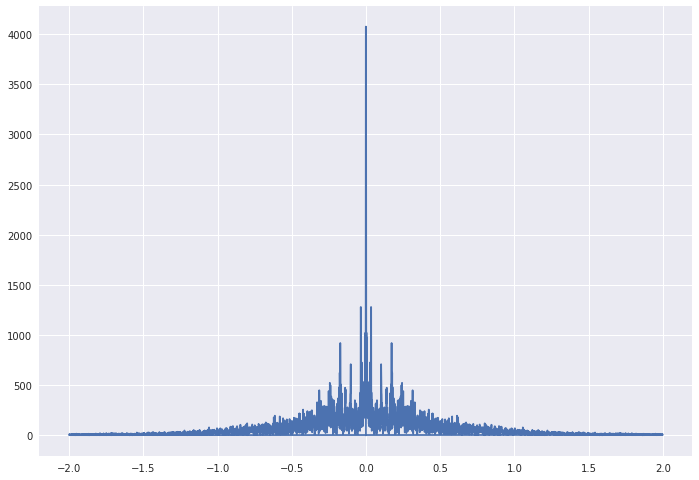

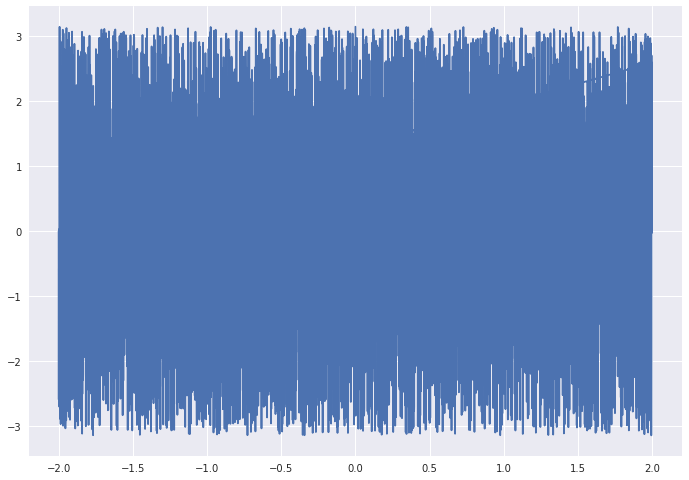

In [67]:
y = ts.x
Y = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 0.25)

plt.figure()
plt.plot( freq, np.abs(Y) )
plt.figure()
plt.plot(freq, np.angle(Y) )
plt.show()

In [68]:
h, e = np.histogram(Y, 100)

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/numpy/lib/function_base.py:786: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/home/c/lab/envs/pdkit/lib/python3.6/site-packages/numpy/lib/function_base.py:792: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)


In [69]:
np.sum(h[::2]) / np.sum(h[1::2])

1.0678527099710384

In [70]:
np.sqrt(np.mean(ts.mag_sum_acc))

3.1362579104789425

In [71]:
first_foot

[1553]

In [72]:
first_strides = list(zip(first_foot[::2], first_foot[1::2]))
second_strides = list(zip(second_foot[::2], second_foot[1::2]))

first_str_duration = [np.sum(a) / gp.sampling_frequency for a in first_strides]
second_str_duration = [np.sum(a) / gp.sampling_frequency for a in second_strides]

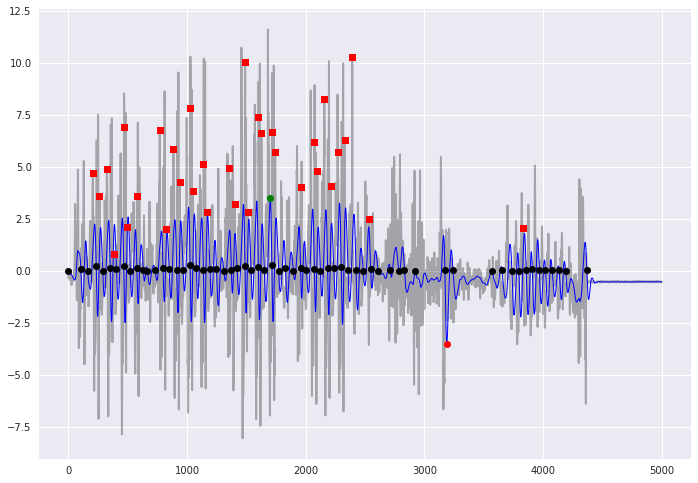

In [73]:
x = ts.mag_sum_acc

strikes, strike_indices = gp.heel_strikes(x)
data = x.values

filtered = butter_lowpass_filter(data, sample_rate=100.0, cutoff=2.0, order=4)
transitions = crossings_nonzero_pos2neg(filtered)
tplot = np.linspace(0, np.size(data), np.size(data))

top = [np.argmax(filtered), filtered[np.argmax(filtered)]]
bot = [np.argmin(filtered), filtered[np.argmin(filtered)]]

plt.plot(tplot, data, 'k-', linewidth=2, label='data', alpha=0.3)
plt.plot(tplot, filtered, 'b-', linewidth=1, label='filtered data')

plt.plot(tplot[transitions], filtered[transitions], 'ko', linewidth=1, label='transition points')
plt.plot(tplot[strike_indices], data[strike_indices], 'rs', linewidth=1, label='heel strikes')

plt.plot(top[0], top[1], 'go')
plt.plot(bot[0], bot[1], 'ro')

In [74]:
import scipy.signal as sig

In [75]:
def start_end_turn(f_sig, freq=200):
    
    gt = sig.argrelextrema(f_sig, np.greater)[0]
    lt = sig.argrelextrema(f_sig, np.less)[0]
    
    peaks = sorted(list(gt) + list(lt))

    top_peak = np.argmax(f_sig[peaks])
    bot_peak = np.argmin(f_sig[peaks])
    
    if top_peak > bot_peak:
        start_turn = peaks[bot_peak - 1]
        end_turn = peaks[top_peak + 1]
    else:
        start_turn = peaks[top_peak - 1]
        end_turn = peaks[bot_peak + 1]


    plt.plot(f_sig)
    plt.plot(start_turn, f_sig[start_turn], 'go')
    plt.plot(end_turn, f_sig[end_turn], 'ro')
    
    return start_turn, end_turn

In [76]:
s_y, e_y = start_end_turn(ts.y)

ValueError: the 'mode' parameter is not supported in the pandas implementation of take()

In [ ]:
s_z, e_z = start_end_turn(ts.z)

In [ ]:
s_x, e_x = start_end_turn(ts.x)

In [ ]:
plt.plot(ts.y.values)
plt.plot(start_turn, ts.y[s], 'go')
plt.plot(end_turn, ts.y[e], 'ro')

In [84]:
def walk_turn_times(data, freq, verbose=False):
    signal = butter_lowpass_filter(data, freq, cutoff=2, order=3)
    
    start, end = start_end_turn(signal)
    
    forward = signal[:start]
    backward = signal[end:]
    turn = signal[start:end]
    
    time_f = len(forward) / freq
    time_b = len(backward) / freq
    time_t = len(turn) / freq
    
    if verbose:
        print("Time it took to walf forward: {} s".format(time_f))
        print("Time it took to turn: {} s".format(time_t))
        print("Time it took to walk backwards: {} s ".format(time_b))
    
    return time_f, time_t, time_b

In [85]:
def two_axis_turn_time(data, freq):
    f_y, t_y, b_y = walk_turn_times(data.y, freq)
    f_z, t_z, b_z = walk_turn_times(data.z, freq)
    
    f = np.mean([f_y, f_z])
    t = np.mean([t_y, t_z])
    b = np.mean([b_y, b_z])
    
    print("Time it took to walf forward: {} s".format(f))
    print("Time it took to turn: {} s".format(t))
    print("Time it took to walk backwards: {} s ".format(b))

Time it took to walf forward: 16.295 s
Time it took to turn: 19.39 s
Time it took to walk backwards: 14.295 s 


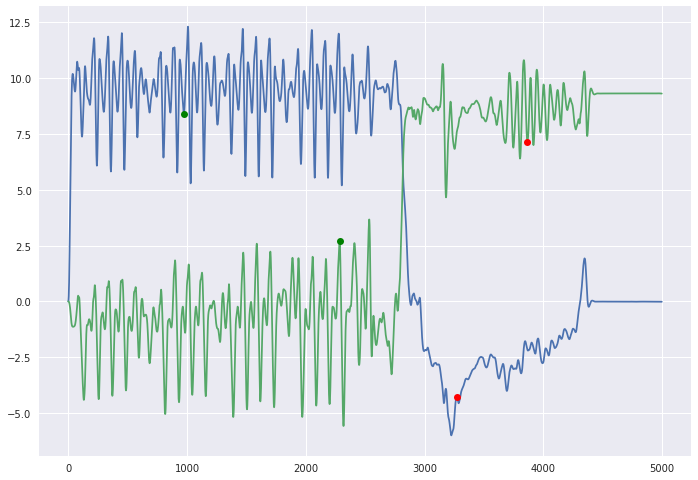

In [86]:
two_axis_turn_time(ts, 100)

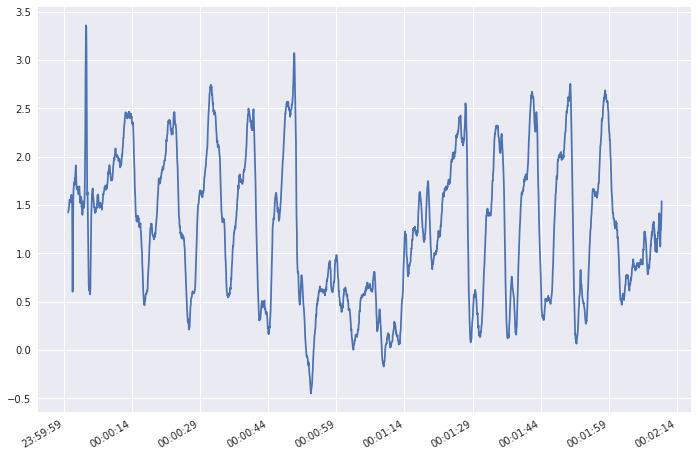

In [98]:
cts.y.plot()

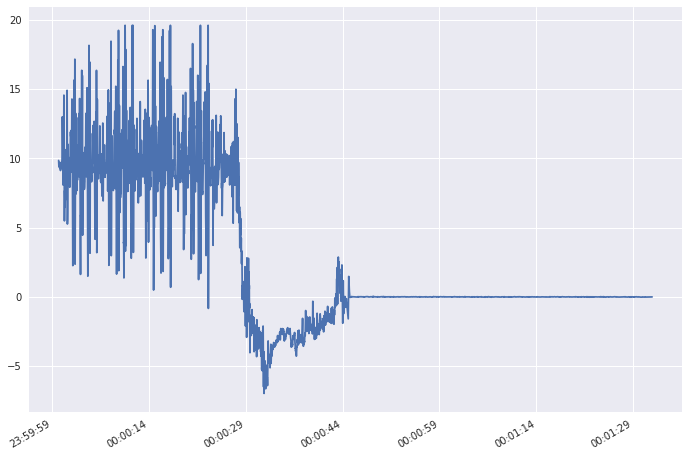

In [100]:
pts.y.plot()

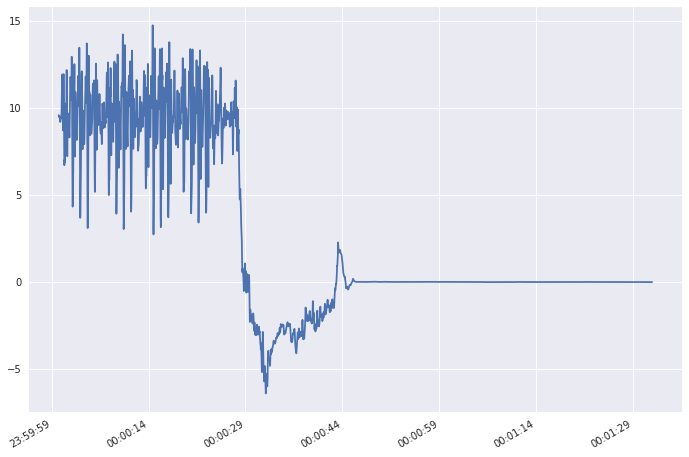

In [125]:
pts.y

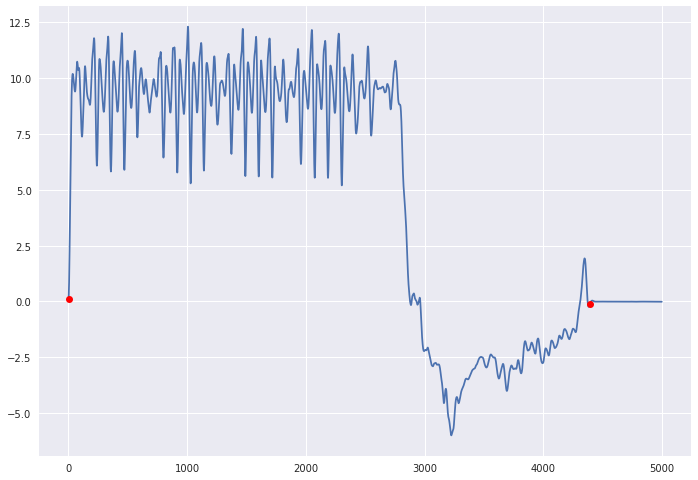

In [162]:
def calculate_static_signal(signal, frequency=100, cutoff=2, order=3):

    signal = butter_lowpass_filter(signal, frequency, cutoff=cutoff, order=order)
    
    for i, s in enumerate(signal):
        if not (-0.1 <= s <= 0.1):
            start = i
            break
    
    for i, s in reversed(list(enumerate(signal))):
        if not (-0.1 <= s <= 0.1):
            stop = i
            break
            
    return start, stop

start, stop = calculate_static_signal(pts.y)

plt.plot(signal)
plt.plot(start, signal[start], 'ro')
plt.plot(stop, signal[stop], 'ro')

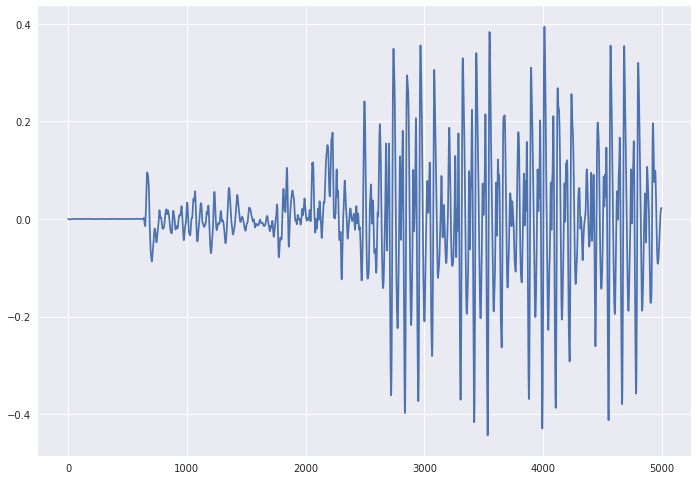

In [139]:
plt.plot(np.gradient(signal))